<a href="https://colab.research.google.com/github/Huwalli/PLta/blob/main/%E3%80%8C%E7%AC%AC%E4%B9%9D%E9%80%B1_%E7%B0%A1%E5%96%AE%E7%9A%84%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8%E6%A8%A1%E5%9E%8B_Part1_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 飲料價格的預測

以剛才的飲料為例，這邊試試看電腦會怎麼估價!!

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
# 輸入現有手搖ml及價格資料
X_train = np.array([300, 400, 500, 600, 700]).reshape(-1, 1)
y_train = [35, 45, 55, 65, 75]

model = LinearRegression()
model.fit(X_train, y_train)

# 預測 550ml 的價格
print(model.predict([[550]]))

[60.]


In [7]:
# 計算訓練資料的 R²
r_squared = model.score(X_train, y_train)
print("訓練資料的 R²:", r_squared)

訓練資料的 R²: 1.0


想想看，如果我今天700ml的訂價改成70，要怎麼知道550ml的手搖多少錢?請直接修改上面的程式碼取的答案 !!以及他們的R²誰比較高 (10min)

# 畫個線性迴歸圖

這邊以

X(ml數) = [300, 400, 500, 600, 700]


y(價格) = [35, 45, 55, 65, 70]

的例子為例劃出線性回歸預測圖

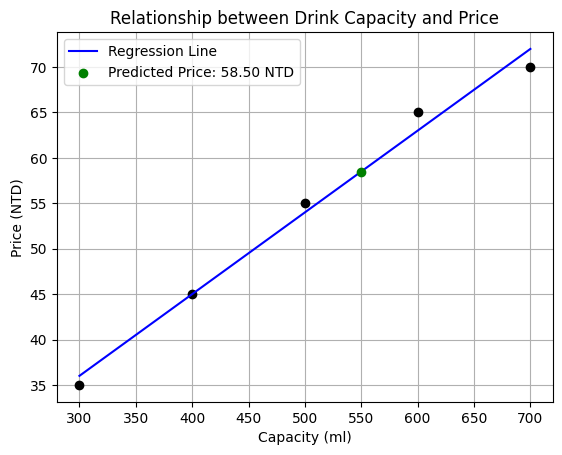

In [13]:
import numpy as np  # 引入 NumPy，用於數據處理和數值計算
import matplotlib.pyplot as plt  # 引入 Matplotlib，用於繪圖
from sklearn.linear_model import LinearRegression  # 引入線性回歸模型

# 輸入現有手搖飲料容量(ml)及對應價格(NTD)資料
X_train = np.array([300, 400, 500, 600, 700]).reshape(-1, 1)  # 將容量資料轉換為二維陣列，因為 scikit-learn 要求特徵矩陣是二維的
y_train = [35, 45, 55, 65, 70]  # 對應的價格資料

# 建立線性回歸模型
model = LinearRegression()

# 使用訓練資料來訓練模型
model.fit(X_train, y_train)  # 擬合線性回歸模型，根據容量來預測價格

# 預測 550ml 的價格
predicted_price = model.predict([[550]])  # 輸入 550ml 作為新資料，預測對應的價格

# 繪製圖表
plt.figure()  # 新建一個圖形窗口
plt.title('Relationship between Drink Capacity and Price')  # 設定圖表標題
plt.xlabel('Capacity (ml)')  # 設定 x 軸標籤：容量(ml)
plt.ylabel('Price (NTD)')  # 設定 y 軸標籤：價格(NTD)

# 繪製已知的容量與價格資料點，'ko' 代表畫黑色圓點
plt.plot(X_train, y_train, 'ko')  # 繪製實際資料點，'ko' 代表黑色圓點

# 繪製回歸直線，使用已訓練的模型預測對應每個容量的價格
plt.plot(X_train, model.predict(X_train), 'b-', label='Regression Line')  # 繪製回歸線，'b-' 代表藍色實線

# 在圖上標註 550ml 預測的價格，使用綠色標註並顯示預測結果
plt.scatter(550, predicted_price, color='green', label=f'Predicted Price: {predicted_price[0]:.2f} NTD', zorder=5)  # 預測點，顯示550ml預測價格，並顯示在圖中

# 顯示圖例，這樣可以標識回歸線和預測點
plt.legend()  # 顯示圖例，標註回歸線和預測點

# 顯示網格線，便於觀察數據點與回歸線的關係
plt.grid(True)  # 開啟網格線顯示

# 顯示圖表
plt.show()  # 顯示圖表



這條線該怎麼畫？
- 憑感覺？

- 以下的程式碼將用手動來畫畫看


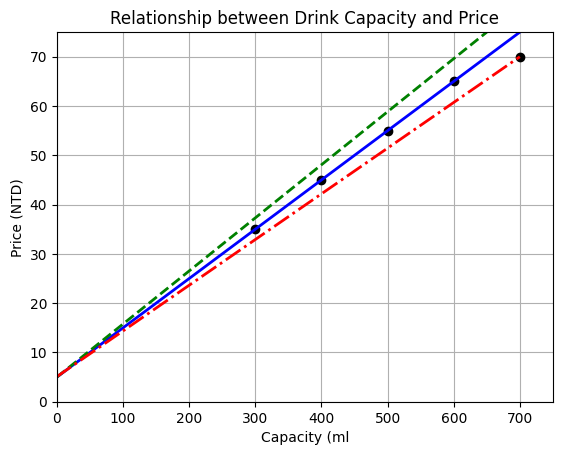

In [35]:
plt.figure()
plt.title('Relationship between Drink Capacity and Price')
plt.xlabel('Capacity (ml')
plt.ylabel('Price (NTD)')
plt.plot(X_train, y_train, 'ko')
plt.axis([0, 750, 0, 75]) # 圖表範圍
plt.grid(True)
plt.plot([0, 700], [5, 75], color='b', linestyle='-', linewidth=2) # 畫一條從(0,5)到(700,75)的藍線
plt.plot([0, 650], [5, 75], color='g', linestyle='--', linewidth=2) # 畫一條從(0,5)到(650,75)的綠線
plt.plot([-1, 700], [5, 70], color='r', linestyle='-.', linewidth=2) # 畫一條從(-1,5)到(700,70)的紅線
plt.show()


我們沒辦法手動去畫出這條預測線，所以一定要用電腦自己去畫

# 模型訓練方法（簡單線性迴歸）

我們想找出一條能代表「飲料容量跟價格關係」的直線，公式是：

價格(y) = 容量(x) × 斜率 + 截距

- 怎麼找這條線？

變異數：看容量的數據離平均有多遠。數字差很多 → 變異數大。

共變異數：看容量變大時，價格有沒有也變大。

- 怎麼算斜率和截距？

斜率 = 共變異數 ÷ 變異數：每增加一點容量，價格多多少。

截距 = 價格平均 − 斜率 × 容量平均

這樣就能用容量預測價格囉！

## 手動訓練(比較麻煩)

In [44]:
import numpy as np

# 設定飲料容量（ml）作為 X
X = np.array([[300], [400], [500], [600], [700]]).reshape(-1, 1)

# 計算容量的平均值（樣本平均）
x_bar = X.mean()
print("x_bar（容量平均）:", x_bar)

# 計算樣本變異數
variance = ((X - x_bar)**2).sum() / (X.shape[0] - 1)
print("variance（樣本變異數）:", variance)

# 設定對應的價格（NTD）
y = np.array([35, 45, 55, 65, 70])

# 計算價格的平均值
y_bar = y.mean()

# 計算 X 與 y 的共變異數（衡量兩變數的線性關係方向與強度）
covariance = np.multiply((X - x_bar).transpose(), y - y_bar).sum() / (X.shape[0] - 1)
print("covariance（共變異數）:", covariance)

# 計算斜率（beta）= 共變異數 / 變異數
beta = covariance / variance
print("beta（斜率）:", beta)

# 計算截距（alpha）= y 平均 - beta * x 平均
alpha = y_bar - beta * x_bar
print("alpha（截距）:", alpha)

# 預測 550ml 飲料的價格
print('A 550ml drink should cost: $%.2f NTD' % (alpha + beta * 550))

# 預測 700ml 飲料的價格
print('A 700ml drink should cost: $%.2f NTD' % (alpha + beta * 700))


x_bar（容量平均）: 500.0
variance（樣本變異數）: 25000.0
covariance（共變異數）: 2250.0
beta（斜率）: 0.09
alpha（截距）: 9.0
A 550ml drink should cost: $58.50 NTD
A 700ml drink should cost: $72.00 NTD


## 使用Sciket learn 簡化
- 這邊教大家一個簡單的套件，sciken learn。專門用於機器學習和數據分析。它提供了一些高效的工具和算法，幫助開發者進行數據預處理、特徵選擇、模型訓練、預測、評估等工作。Scikit-learn 適用於各種機器學習任務，如分類、回歸、聚類、降維、特徵擴展、模型選擇和數據處理等。

In [38]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 輸入現有飲料容量（ml）及價格資料
X_train = np.array([300, 400, 500, 600, 700]).reshape(-1, 1)  # 容量（ml）
y = [35, 45, 55, 65, 70]  # 價格（NTD）

# 創建一個線性回歸模型
model = LinearRegression()
# 使用現有資料訓練模型
model.fit(X_train, y)

# 預測 550ml 飲料的價格
test_drink = np.array([[550]])  # 預測的容量
predicted_price = model.predict(test_drink)[0]
print('A 550ml drink should cost: $%.2f NTD' % predicted_price)

# 預測 700ml 飲料的價格
test_drink = np.array([[700]])  # 預測的容量
predicted_price = model.predict(test_drink)[0]
print('A 700ml drink should cost: $%.2f NTD' % predicted_price)

# 預測並計算剩餘誤差
# print('Residual sum of squares: %.2f' % np.mean((model.predict(X_train) - y) ** 2))


A 550ml drink should cost: $58.50 NTD
A 700ml drink should cost: $72.00 NTD


# R-squared


## 手動計算(比較麻煩)
在用手動計算R²決定係數的時候會需要先得SStot（總變異平方和）跟SSres（殘差平方和）才能計算，知道我們的回歸預測模型有沒有準，很麻煩。

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 訓練資料：容量（ml）和價格（NTD）
X_train = np.array([300, 400, 500, 600, 700]).reshape(-1, 1)
y_train = [35, 45, 55, 65, 70]

# 測試資料：容量（ml）和對應的實際價格（NTD）
X_test = np.array([350, 450, 550, 650, 750]).reshape(-1, 1)
y_test = [38, 48, 58, 68, 75]  # 測試資料的答案，可以和預測出來的結果比較，用於評估準確率

# 建立並訓練模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測測試集的 y 值
y_pred = model.predict(X_test)

# 計算 SStot（總變異平方和）
y_mean = np.mean(y_test)
SStot = np.sum((y_test - y_mean) ** 2)

# 計算 SSres（殘差平方和）
SSres = np.sum((y_test - y_pred) ** 2)

# 計算 R-squared
R_squared = 1 - (SSres / SStot)

# 輸出結果
print("SStot:", SStot)
print("SSres:", SSres)
print("R-squared:", R_squared)




SStot: 887.2
SSres: 11.250000000000036
R-squared: 0.987319657348963


## 使用函式快速計算

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 訓練資料：容量（ml）和價格（NTD）
X_train = np.array([300, 400, 500, 600, 700]).reshape(-1, 1)
y_train = [35, 45, 55, 65, 70]

# 測試資料：容量（ml）和對應的實際價格（NTD）
X_test = np.array([350, 450, 550, 650, 750]).reshape(-1, 1)
y_test = [38, 48, 58, 68, 75]  # 測試資料的答案，可以和預測出來的結果比較，用於評估準確率

# 建立並訓練模型
model = LinearRegression()
model.fit(X_train, y_train)

# 計算訓練資料的 R-squared
train_r_squared = model.score(X_train, y_train)
print("Training R-squared:", train_r_squared)

# 計算測試資料的 R-squared
test_r_squared = model.score(X_test, y_test)
print("Testing R-squared:", test_r_squared)



Training R-squared: 0.9878048780487805
Testing R-squared: 0.987319657348963
